In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mishkal_df = pd.read_csv('https://raw.githubusercontent.com/tamarsheinbach/AL_hamishkal/main/Al_Hamishkal_Data.csv')
# mishkal_df

In [3]:
## להוריד עמודות
mishkal_df.drop('שם_לקוח',axis='columns',inplace=True)
# # mishkal_df

## להוריד את כל השורות הריקות בעמודות המוזכרות
mishkal_df = mishkal_df.dropna(subset=['ת_קניה_אחרונה', 'סהכ_קניות', 'ישוב'])
# mishkal_df

## לחלץ רק את התאריך בעמודת תאריך (להוריד את השעה)
mishkal_df['ת_קניה_אחרונה'] = pd.to_datetime(mishkal_df['ת_קניה_אחרונה'])
# mishkal_df

## להגדיר תנאי שתאריך קניה אחרון הוא אחרי 1.1.2019 וספירת אינדקסים מ-0
mishkal_df = mishkal_df[mishkal_df['ת_קניה_אחרונה']>'2019-01-01'].reset_index(drop=True)
# mishkal_df

## למלא את כל הערכים החסרים ב-0, בכל המחלקות
#pd.isnull(mishkal_df).sum()
mishkal_df.fillna('0',inplace = True)
mishkal_df

,לקוח,ישוב,מספר_פתקיות,סהכ_קניות,קניה_ממוצעת,ת_קניה_אחרונה,תבלינים_טחונים,תבלינים_שלמים,תערובות_תיבול,קטניות,...,ארטיקים,חטיפים,שונות,אריזות_93,מועדון,ממרחים,כללי,שיווק_ישע,פירות_קפואים,טואלטיקה_טבעית
0,10000073,ירושלים,1,68,68,2019-04-17,0,0,0,0,...,0,0,-9,0,17,0,0,0,0,0
1,10000125,גבע בנימין,53,4088,77,2021-04-22,673,222,124,148,...,0,0,3,0,50,0,0,0,21,0
2,120512,גבעת שמואל,16,1439,90,2021-03-25,27,33,8,5,...,0,0,0,0,0,0,0,0,0,0
3,112244,עלי,1,57,57,2019-07-16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120075,גבעת שמואל,9,1470,163,2021-04-09,0,4,80,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,130290,קדומים,164,6968,42,2021-04-16,16,31,6,80,...,0,0,-26,0,51,12,0,0,0,0
2073,110264,עפרה,137,8304,61,2021-04-26,36,3,0,579,...,0,422,134,0,51,0,32,0,24,0
2074,112474,טלמון,12,2450,204,2021-03-17,73,7,0,73,...,0,0,-18,0,33,0,0,0,0,0
2075,110189,שילה,29,2279,79,2021-03-16,64,25,153,33,...,10,56,-25,0,50,0,15,0,30,0


In [4]:
## איחוד עמודות לפי קבוצות

## תבלינים
mishkal_df['תבלינים_טחונים'] = mishkal_df['תבלינים_טחונים'].astype('int64')
mishkal_df['תבלינים_שלמים'] = mishkal_df['תבלינים_שלמים'].astype('int64')
mishkal_df['תערובות_תיבול'] = mishkal_df['תערובות_תיבול'].astype('int64')

mishkal_df['תבלינים'] = mishkal_df['תבלינים_טחונים'] + mishkal_df['תבלינים_שלמים'] + mishkal_df['תערובות_תיבול']

mishkal_df.drop('תבלינים_טחונים',axis='columns',inplace=True)
mishkal_df.drop('תבלינים_שלמים',axis='columns',inplace=True)
mishkal_df.drop('תערובות_תיבול',axis='columns',inplace=True)

## רטבים וממרחים
mishkal_df['רטבים_וקונפיטורות'] = mishkal_df['רטבים_וקונפיטורות'].astype('int64')
mishkal_df['רכזים_ותמציות'] = mishkal_df['רכזים_ותמציות'].astype('int64')
mishkal_df['דבש'] = mishkal_df['דבש'].astype('int64')
mishkal_df['ממרחים'] = mishkal_df['ממרחים'].astype('int64')

mishkal_df['רטבים_וממרחים'] = mishkal_df['רטבים_וקונפיטורות'] + mishkal_df['רכזים_ותמציות'] + mishkal_df['דבש'] + mishkal_df['ממרחים']

mishkal_df.drop('רטבים_וקונפיטורות',axis='columns',inplace=True)
mishkal_df.drop('רכזים_ותמציות',axis='columns',inplace=True)
mishkal_df.drop('דבש',axis='columns',inplace=True)
mishkal_df.drop('ממרחים',axis='columns',inplace=True)

## פירות יבשים
mishkal_df['פירות_יבשים'] = mishkal_df['פירות_יבשים'].astype('int64')
mishkal_df['פירות_יבשים_ללא_סוכר'] = mishkal_df['פירות_יבשים_ללא_סוכר'].astype('int64')

mishkal_df['פירות_יבשים'] = mishkal_df['פירות_יבשים'] + mishkal_df['פירות_יבשים_ללא_סוכר']

mishkal_df.drop('פירות_יבשים_ללא_סוכר',axis='columns',inplace=True)

## פיצוחים
mishkal_df['פיצוחים'] = mishkal_df['פיצוחים'].astype('int64')
mishkal_df['פיצוחים_מוכנים'] = mishkal_df['פיצוחים_מוכנים'].astype('int64')

mishkal_df['פיצוחים'] = mishkal_df['פיצוחים'] + mishkal_df['פיצוחים_מוכנים'] 

mishkal_df.drop('פיצוחים_מוכנים',axis='columns',inplace=True)

## פינוקים
mishkal_df['ארטיקים'] = mishkal_df['ארטיקים'].astype('int64')
mishkal_df['חטיפים'] = mishkal_df['חטיפים'].astype('int64')
mishkal_df['חלבה_ומיוחדים'] = mishkal_df['חלבה_ומיוחדים'].astype('int64')
mishkal_df['ממתקים'] = mishkal_df['ממתקים'].astype('int64')
mishkal_df['שתיה'] = mishkal_df['שתיה'].astype('int64')
mishkal_df['עוגות_ועוגיות'] = mishkal_df['עוגות_ועוגיות'].astype('int64')

mishkal_df['פינוקים'] = mishkal_df['ארטיקים'] + mishkal_df['חטיפים'] + mishkal_df['חלבה_ומיוחדים'] + mishkal_df['ממתקים'] + mishkal_df['שתיה'] + mishkal_df['עוגות_ועוגיות']

mishkal_df.drop('ארטיקים',axis='columns',inplace=True)
mishkal_df.drop('חטיפים',axis='columns',inplace=True)
mishkal_df.drop('חלבה_ומיוחדים',axis='columns',inplace=True)
mishkal_df.drop('ממתקים',axis='columns',inplace=True)
mishkal_df.drop('שתיה',axis='columns',inplace=True)
mishkal_df.drop('עוגות_ועוגיות',axis='columns',inplace=True)

## מוצרי טבע
mishkal_df['מוצרי_טבע'] = mishkal_df['מוצרי_טבע'].astype('int64')
mishkal_df['טואלטיקה_טבעית'] = mishkal_df['טואלטיקה_טבעית'].astype('int64')

mishkal_df['מוצרי_טבע'] = mishkal_df['מוצרי_טבע'] + mishkal_df['טואלטיקה_טבעית']

mishkal_df.drop('טואלטיקה_טבעית',axis='columns',inplace=True)

## שונות
mishkal_df['שונות'] = mishkal_df['שונות'].astype('int64')
mishkal_df['כלים'] = mishkal_df['כלים'].astype('int64')
mishkal_df['שיווק_ישע'] = mishkal_df['שיווק_ישע'].astype('int64')
mishkal_df['מוצרים_ללא_מעמ'] = mishkal_df['מוצרים_ללא_מעמ'].astype('int64')
mishkal_df['אריזות_93'] = mishkal_df['אריזות_93'].astype('int64')
mishkal_df['אריזות'] = mishkal_df['אריזות'].astype('int64')
mishkal_df['כללי'] = mishkal_df['כללי'].astype('int64')
mishkal_df['חלב_עיזים'] = mishkal_df['חלב_עיזים'].astype('int64')

mishkal_df['שונות'] = mishkal_df['שונות'] + mishkal_df['כלים'] + mishkal_df['שיווק_ישע'] + mishkal_df['מוצרים_ללא_מעמ'] + mishkal_df['אריזות_93'] + mishkal_df['אריזות'] + mishkal_df['כללי'] + mishkal_df['חלב_עיזים']

mishkal_df.drop('כלים',axis='columns',inplace=True)
mishkal_df.drop('שיווק_ישע',axis='columns',inplace=True)
mishkal_df.drop('מוצרים_ללא_מעמ',axis='columns',inplace=True)
mishkal_df.drop('אריזות_שי',axis='columns',inplace=True)
mishkal_df.drop('אריזות',axis='columns',inplace=True)
mishkal_df.drop('כללי',axis='columns',inplace=True)
mishkal_df.drop('אריזות_93',axis='columns',inplace=True)
mishkal_df.drop('חלב_עיזים',axis='columns',inplace=True)

mishkal_df

,לקוח,ישוב,מספר_פתקיות,סהכ_קניות,קניה_ממוצעת,ת_קניה_אחרונה,קטניות,שמן,קמח,מוצרי_אפייה,...,ללא_גלוטן,ויטמינים_ותוספי_תזונה,חליטות_תה,קפה,שונות,מועדון,פירות_קפואים,תבלינים,רטבים_וממרחים,פינוקים
0,10000073,ירושלים,1,68,68,2019-04-17,0,0,0,0,...,0,0,0,0,-9,17,0,0,0,0
1,10000125,גבע בנימין,53,4088,77,2021-04-22,148,287,133,164,...,0,106,0,0,198,50,21,1019,59,70
2,120512,גבעת שמואל,16,1439,90,2021-03-25,5,0,0,0,...,0,323,13,0,17,0,0,68,0,20
3,112244,עלי,1,57,57,2019-07-16,0,0,0,0,...,0,0,0,0,35,0,0,0,0,0
4,120075,גבעת שמואל,9,1470,163,2021-04-09,6,0,0,0,...,0,162,0,0,51,0,0,84,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,130290,קדומים,164,6968,42,2021-04-16,80,18,642,61,...,57,577,45,0,248,51,0,53,29,292
2073,110264,עפרה,137,8304,61,2021-04-26,579,228,64,71,...,14,291,17,0,308,51,24,39,77,1274
2074,112474,טלמון,12,2450,204,2021-03-17,73,170,218,47,...,0,0,0,0,33,33,0,80,68,53
2075,110189,שילה,29,2279,79,2021-03-16,33,0,382,6,...,0,5,27,0,15,50,30,242,22,160


In [5]:
mishkal_df.columns

Index(['לקוח', 'ישוב', 'מספר_פתקיות', 'סהכ_קניות', 'קניה_ממוצעת',
       'ת_קניה_אחרונה', 'קטניות', 'שמן', 'קמח', 'מוצרי_אפייה',
       'שקדים_אגוזים_וכד', 'פיצוחים', 'פירות_יבשים', 'מוצרי_טבע', 'ללא_גלוטן',
       'ויטמינים_ותוספי_תזונה', 'חליטות_תה', 'קפה', 'שונות', 'מועדון',
       'פירות_קפואים', 'תבלינים', 'רטבים_וממרחים', 'פינוקים'],
      dtype='object')

In [50]:
mishkal_df1 = mishkal_df.sort_values('ישוב').reset_index(drop=True)
# mishkal_df1



,לקוח,ישוב,מספר_פתקיות,סהכ_קניות,קניה_ממוצעת,ת_קניה_אחרונה,קטניות,שמן,קמח,מוצרי_אפייה,...,ללא_גלוטן,ויטמינים_ותוספי_תזונה,חליטות_תה,קפה,שונות,מועדון,פירות_קפואים,תבלינים,רטבים_וממרחים,פינוקים
0,110592,א.ת. ברקן,8,1880,235,2019-06-07,12,0,184,90,...,0,34,3,0,118,16,0,88,0,164
1,121935,אבן שמואל,1,36,36,2021-03-26,0,0,0,0,...,0,0,0,0,0,17,0,0,0,0
2,10000407,אבני חפץ,48,15564,324,2021-04-18,122,7105,38,64,...,0,122,0,0,487,51,64,146,107,32
3,131230,אבני חפץ,43,2983,69,2020-11-06,70,414,505,4,...,0,201,6,0,64,34,0,19,26,43
4,112467,אבני חפץ,37,4779,129,2021-03-16,35,195,0,31,...,0,893,0,0,204,50,0,18,45,748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,111517,תל ציון,1,36,36,2019-05-23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2073,10000002,תל ציון,7,468,67,2020-02-07,0,0,0,0,...,0,0,0,0,48,17,0,39,20,48
2074,111775,תל ציון,174,9584,55,2021-04-23,12,0,2885,12,...,0,103,79,7,461,67,0,213,160,406
2075,112712,תל ציון,30,2742,91,2021-04-14,240,36,0,9,...,0,99,19,57,10,50,0,253,44,115


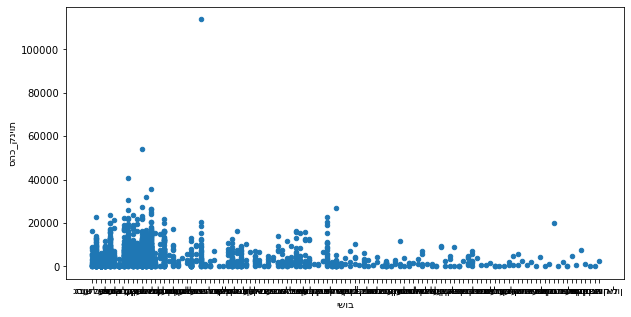

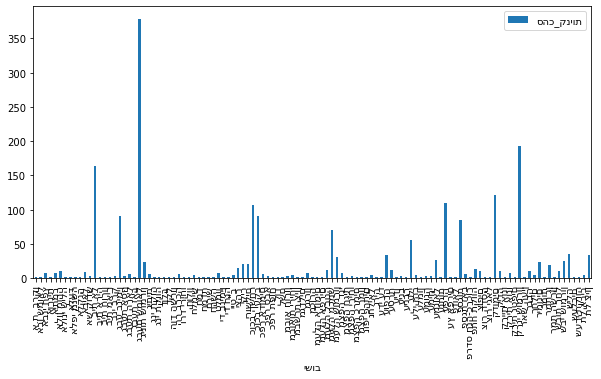

In [48]:
## מיון לפי ישוב ומספר ישוב
mishkal_df[['ישוב','סהכ_קניות']].sort_values('ישוב')

mishkal_df.plot.scatter(x='ישוב',y='סהכ_קניות',figsize = (10,5))
# sns.countplot(x='City', data=mishkal_df)
mishkal_df1 = mishkal_df.groupby('ישוב')[['סהכ_קניות']]
mishkal_df1.count().plot.bar(figsize=(10,5))

In [8]:
# # יותר מדי ערים - לצמצם רשימת ערים - איחוד לקניות לפי ישוב

# # mishkal_df.dtypes

# # להפוך את הדאטה של מספר הקניות לסטרינג כדי שנוכל לאחד את כל השורות שלו לפי ישובים
# mishkal_df['סהכ_קניות'] = mishkal_df['סהכ_קניות'].astype('str')
# mishkal_df1 = mishkal_df.groupby('ישוב')['סהכ_קניות'].apply(' '.join).reset_index()
# mishkal_df1.pivot_table('סהכ_קניות', columns='ישוב',aggfunc='sum')

In [9]:
# #קורלציה 1
# #חלוקה לקבוצות - להכניס את סוגי האוכלים לקבוצות מוגדרות של מותרות/בסיסי(יקר/בינוני וזול)
# #bins = 
# sales_groups = ['Cheap','Medium','Expensive']
# #mishkal_df[[]]

In [10]:
# #קורלציה 2
# #להראות ירידה או עליה בקניות בקורונה - צריך להמיר את מספר הקניות לאינט

# mishkal_df['סהכ_קניות'] = mishkal_df['סהכ_קניות'].astype('int64')
# # mishkal_df.dtypes

# #mishkal_df1 = mishkal_df[mishkal_df['Num_of_purchases']<'60000'](drop=False)
# mishkal_df1['ת_קניה_אחרונה'] = mishkal_df[mishkal_df['ת_קניה_אחרונה']>'2020-01-01'].reset_index(drop=False)
# mishkal_df1
# # mishkal_df1.plot.scatter(x = 'Last_purchase_date', y = 'Num_of_purchases')
# # plt.scatter(mishkal_df1['Last_purchase_date'], mishkal_df1['Num_of_purchases'])
# # sns.scatterplot(data=mishkal_df1, x='ת_קניה_אחרונה', y='סהכ_קניות')
# # sns.regplot(data=mishkal_df1, x='Last_purchase_date', y='Num_of_purchases')

In [11]:
#מודל חיזוי לכמה קניות יהיו ב2022 לפי ישובים